In [1]:
%reset
import pandas as pd 
import os
import glob
import sys
import subprocess
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pylab import *  
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Get loops

In [2]:
folder_name = 'D:/PPMS Data/Analysis/CMG thickness'
os.chdir(folder_name) 

df1 = pd.read_csv('A064_1_20160318.dat.csv',usecols = [2,3,4],names = ['Field','R','AHE'], header=0)
df2 = pd.read_csv('A065_1_20160321.dat.csv',usecols = [2,3,4],names = ['Field','R','AHE'],header=0)
df3 = pd.read_csv('A074_1_300K.dat.csv',usecols = [2,3,4],names = ['Field','R','AHE'],header=0)
df4 = pd.read_csv('A075_1_300K.dat.csv',usecols = [2,3,4],names = ['Field','R','AHE'],header=0)

thickness=[2.8,3.5,4.1,5.5]

## Get AHE and Hc Data
Entered by hand from excel spreadsheet

In [3]:
x = [2.8,3.5,4.1,5.5]
ahe = [0.537,0.471,0.4,0.18]
ahe_r =  [x[i]*ahe[i]*1E-7 for i in range(len(x))]
hc = [1330,400,100,0]
hc_squid = [1200,400,0,0]
hc_err = 100
ahe_err = [0.02,0.02,0.05,0.05]

## Generate final figure

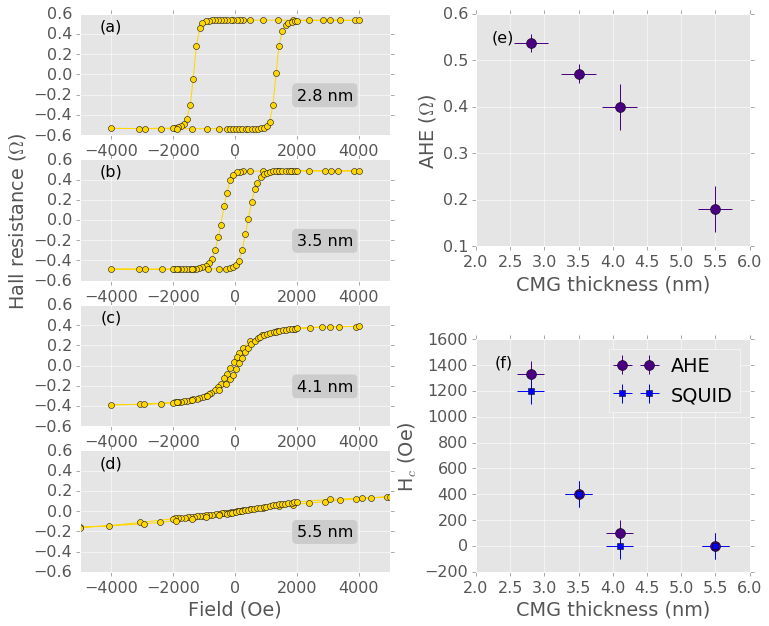

In [18]:
folder_name = 'D:/Papers/Paper - PMA CMG/Fig2'
os.chdir(folder_name)

fig1 = plt.figure(figsize=(10,10))

gs1 = gridspec.GridSpec(4, 3)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs1[0, :])
ax2 = plt.subplot(gs1[1, :])
ax3 = plt.subplot(gs1[2, :])
ax4 = plt.subplot(gs1[3, :])

gs2 = gridspec.GridSpec(2, 1)
gs2.update(left=0.6, right=0.98, hspace=0.4)
ax5 = plt.subplot(gs2[0,0])
ax6 = plt.subplot(gs2[1,0])


"""
Fill in left hand column
"""
ax1.plot(df1['Field'], df1['AHE'],'-o', c='gold', label='cycle 1')
ax2.plot(df2['Field'], df2['AHE'],'-o', c='gold', label='cycle 1')
ax3.plot(df3['Field'], df3['AHE'],'-o', c='gold', label='cycle 1')
ax4.plot(df4['Field'], df4['AHE'],'-o', c='gold', label='cycle 1')


ax4.set_xlabel('Field (Oe)')
#ax1.xaxis.set_ticklabels([])
ax1.set_xlim([-5000,5000])
ax1.set_ylim([-0.6,0.6])
ax2.set_xlim([-5000,5000])
ax2.set_ylim([-0.6,0.6])
ax2.set_ylabel('Hall resistance ($\Omega$)')
ax3.set_xlim([-5000,5000])
ax3.set_ylim([-0.6,0.6])

ax4.set_xlim([-5000,5000])
ax4.set_ylim([-0.6,0.6])


ax1.annotate('2.8 nm', xy=(2000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )
ax1.annotate('(a)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
ax2.annotate('3.5 nm', xy=(2000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )
ax2.annotate('(b)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
ax3.annotate('4.1 nm', xy=(2000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )   
ax3.annotate('(c)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
ax4.annotate('5.5 nm', xy=(2000, -0.25), xycoords='data',
            xytext=(0, 0), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            )
ax4.annotate('(d)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')

"""
Fill in right hand column
"""
# Panel e
ax5.errorbar(x, ahe, c='indigo', yerr = ahe_err , xerr = 0.25, ls='none', markersize = 10, marker = 'o',capsize=0)
#    ax[0].set_xlabel('CMG thickness (nm)')
ax5.set_ylabel('AHE ($\Omega$)')
ax5.set_xlabel('CMG thickness (nm)')
ax5.set_xlim([2,6])

ax5.annotate('(e)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
# Panel f
ax6.errorbar(x, hc, c='indigo', yerr = hc_err,xerr = 0.2, ls='none', markersize = 10,marker = 'o',capsize=0, label = 'AHE')
ax6.errorbar(x, hc_squid, c='blue', yerr = hc_err,xerr = 0.2, ls='none', marker = 's',capsize=0, label = 'SQUID')
ax6.set_xlabel('CMG thickness (nm)')
ax6.set_ylabel('H$_c$ (Oe)')
ax6.set_xlim([2,6])
ax6.annotate('(f)', xy=(.1, 0.9), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
ax6.legend(loc=1)
#savefig('Fig2.jpg',dpi=600,bbox_inches='tight')
#savefig('Fig2.pdf',dpi=900,bbox_inches='tight')